## **Used Car Price Prediction**

Welcome to the "Used Car Price Prediction" notebook! In this project, we embark on a data-driven journey to predict the selling prices of used cars. Leveraging the power of machine learning, specifically employing algorithms like Random Forest and Gradient Boosting, we aim to build models that can capture the intricate patterns within the dataset and provide accurate estimates of a car's market value. Throughout this notebook, we will explore the data, engineer features, fine-tune models, and delve into interpretability aspects using techniques like SHAP values. Join me as we unravel the mysteries behind used car pricing and strive to create a predictive model that adds significant value to the decision-making process for both sellers and buyers. Let's dive in and harness the capabilities of Python and its robust libraries for this exciting journey in predictive analytics!

### **Data Exploration and Understanding:**

#### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
import shap
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### Load the Dataset

In [2]:
usedcar = pd.read_csv("C:/Users/azhar/Desktop/Python/Used_Car_Price_Prediction/cardekho_data.csv")

#### Initial Data Inspection:

In [3]:
usedcar.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
usedcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Bais Statistics

In [5]:
# Step 1: Basic Exploration (excluding 'Year' and 'Owner')
basic_stats = usedcar.describe()
print(basic_stats)


              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


#### Visualization - Pair Plot: (Optional)

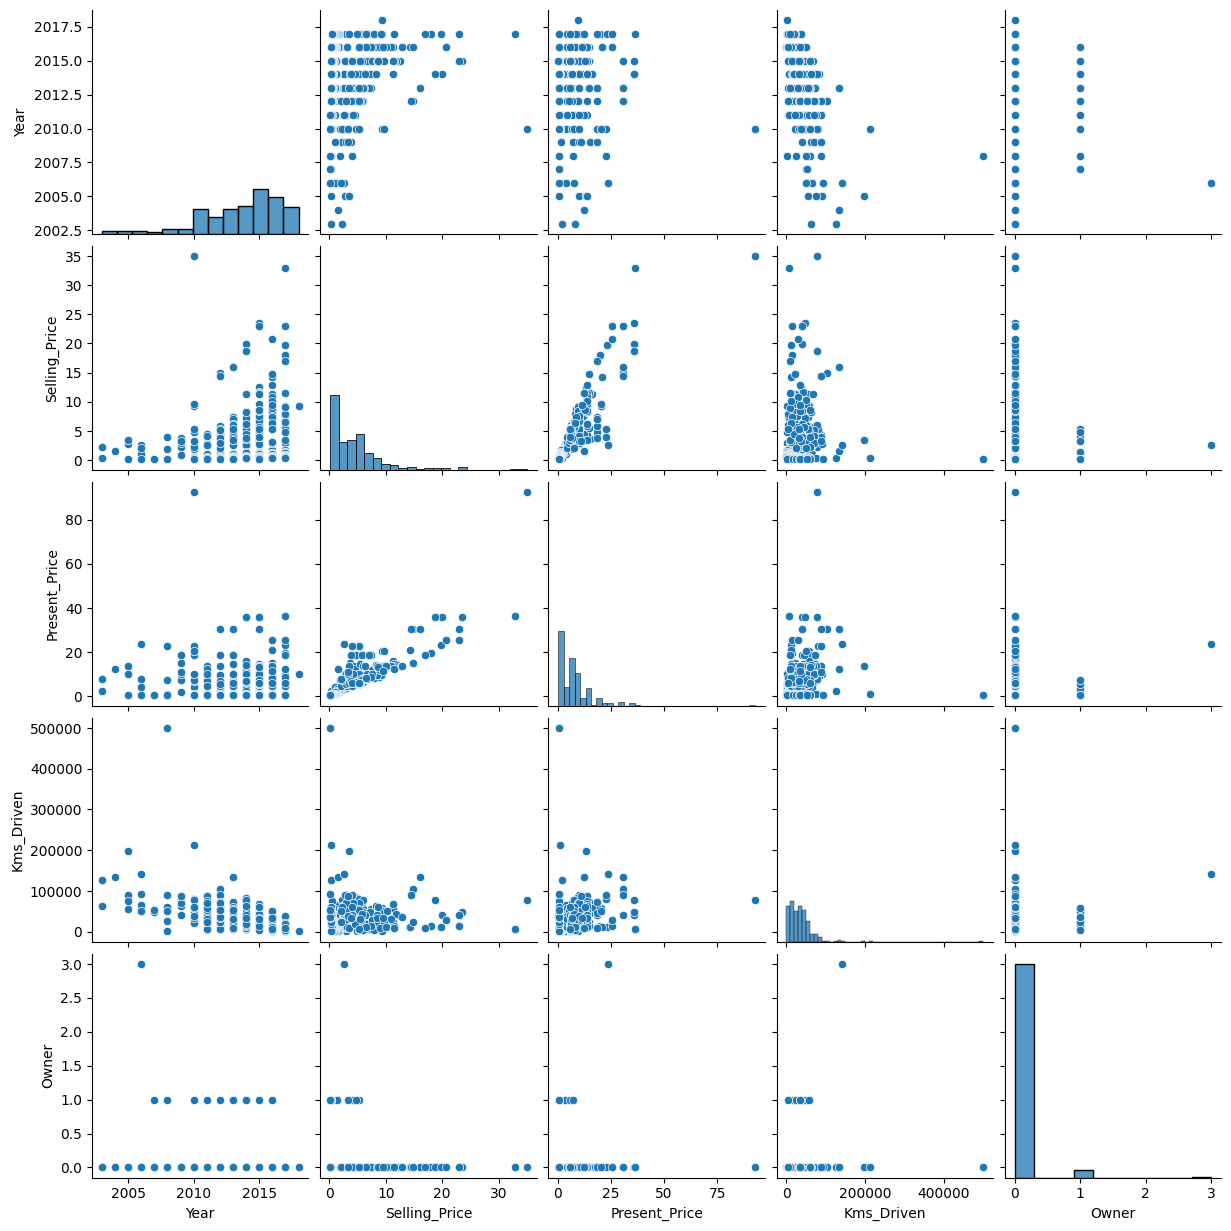

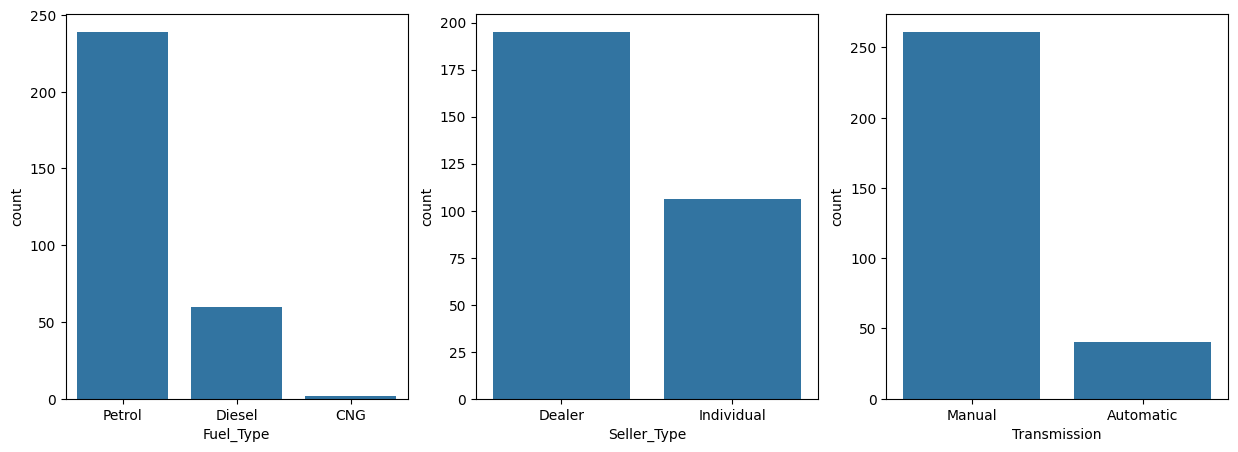

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for numerical features
sns.pairplot(usedcar)
plt.show()

# Count plots for categorical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Fuel_Type', data=usedcar)

plt.subplot(1, 3, 2)
sns.countplot(x='Seller_Type', data=usedcar)

plt.subplot(1, 3, 3)
sns.countplot(x='Transmission', data=usedcar)

plt.show()


### **Feature Engineering and Preprocessing:** **(Optional)**

#### Transform categorical features into numerical format

In [7]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
usedcar['Fuel_Type'] = label_encoder.fit_transform(usedcar['Fuel_Type'])
usedcar['Seller_Type'] = label_encoder.fit_transform(usedcar['Seller_Type'])
usedcar['Transmission'] = label_encoder.fit_transform(usedcar['Transmission'])

# Check the updated DataFrame
print(usedcar.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0  


### **Model Building and Evaluation:**

#### Train-Test Split and Model Building:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = usedcar.drop(['Car_Name', 'Selling_Price'], axis=1)
y = usedcar['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 3.5289272538926286
R-squared Score: 0.8468053957656567


#### Explore More Sophisticated Model - Random Forest Regressor:

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Build a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared Score (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 0.8823054824590156
R-squared Score (Random Forest): 0.9616981508899042


#### Feature Importance:

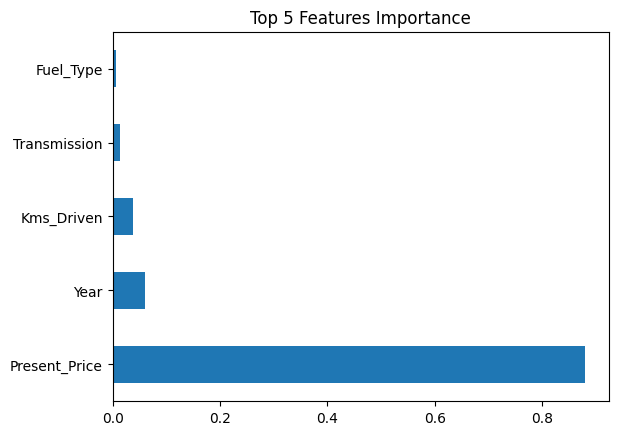

In [10]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.title('Top 5 Features Importance')
plt.show()


#### Hyperparameter Tuning:

In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build the model with the best hyperparameters
optimized_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_optimized = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error (Optimized Random Forest): {mse_optimized}')
print(f'R-squared Score (Optimized Random Forest): {r2_optimized}')


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (Optimized Random Forest): 0.8771012605681273
R-squared Score (Optimized Random Forest): 0.9619240718725606


### **Model Evaluation and Interpretability:**

#### Visualize actual price vs predicted price with a diagonal line (optimized Random Forest)

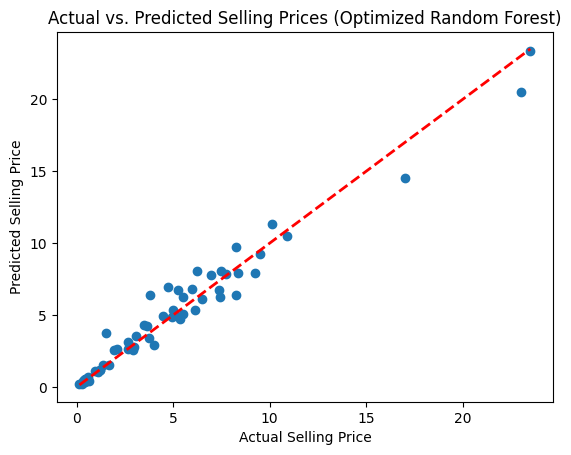

In [12]:
plt.scatter(y_test, y_pred_optimized)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Optimized Random Forest)')
plt.show()


#### Cross-validated Mean Squared Error:

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define the features (X) and target variable (y)
X = usedcar.drop(['Car_Name', 'Selling_Price'], axis=1)
y = usedcar['Selling_Price']

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform k-fold cross-validation (e.g., k=5)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values and calculate mean
mse_cv = -cv_scores
mean_mse_cv = mse_cv.mean()

print(f'Cross-validated Mean Squared Error: {mean_mse_cv}')


Cross-validated Mean Squared Error: 3.487254353892895


#### Cross-validated Mean Squared Error (Gradient Boosting):

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values and calculate mean
mse_cv_gb = -cv_scores_gb
mean_mse_cv_gb = mse_cv_gb.mean()

print(f'Cross-validated Mean Squared Error (Gradient Boosting): {mean_mse_cv_gb}')


Cross-validated Mean Squared Error (Gradient Boosting): 3.543065409823612


#### Make Predictions and Residuals:

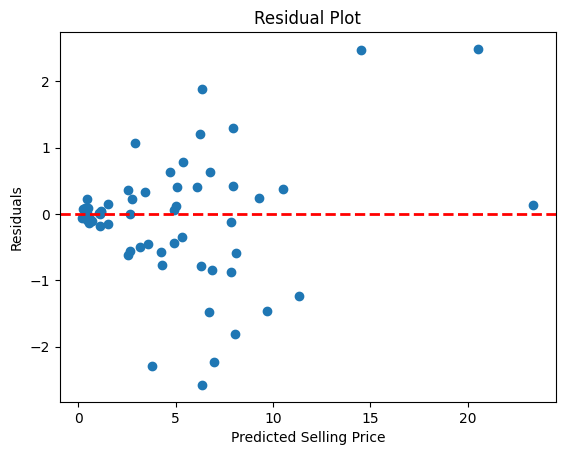

In [15]:
y_pred_optimized = optimized_rf_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_optimized

# Create a residual plot
plt.scatter(y_pred_optimized, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at y=0
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


#### SHAP Values - Interpretability:

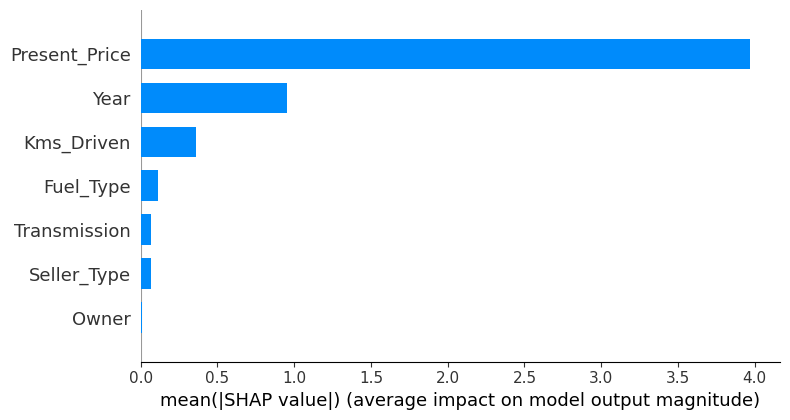

In [16]:
import shap

# Create a SHAP explainer using the optimized Random Forest model
explainer = shap.TreeExplainer(optimized_rf_model)

# Calculate SHAP values for a sample of data points (you can adjust the number of samples)
shap_values = explainer.shap_values(X.iloc[:100, :])

# Create a summary plot of SHAP values
shap.summary_plot(shap_values, X.iloc[:100, :], plot_type='bar')


### **Advanced Visualizations and Model Comparison:**

#### Visualization - Validation Curve and Learning Curve:

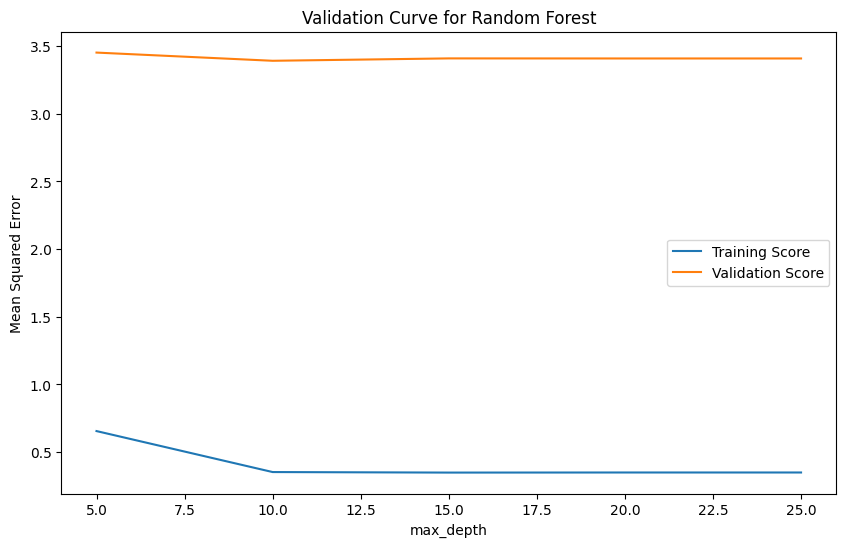

In [17]:
import numpy as np
from sklearn.model_selection import validation_curve

# Define the hyperparameter range to explore (e.g., max_depth)
param_range = [5, 10, 15, 20, 25]

# Calculate validation curve for the Random Forest model
train_scores, test_scores = validation_curve(
    RandomForestRegressor(n_estimators=150, random_state=42),
    X, y, param_name='max_depth', param_range=param_range,
    scoring='neg_mean_squared_error', cv=5
)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, -np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, -np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve for Random Forest')
plt.legend()
plt.show()


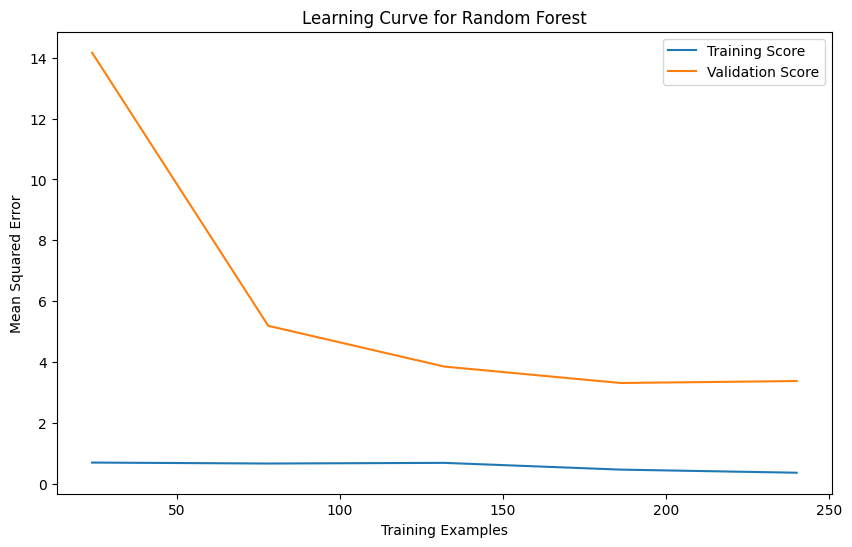

In [18]:
from sklearn.model_selection import learning_curve

# Calculate learning curve for the Random Forest model
train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    RandomForestRegressor(n_estimators=150, random_state=42, max_depth=10),
    X, y, scoring='neg_mean_squared_error', cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -np.mean(train_scores_lc, axis=1), label='Training Score')
plt.plot(train_sizes, -np.mean(test_scores_lc, axis=1), label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.show()


#### Ensemble Approach and Mean Squared Error:

In [19]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model with optimized hyperparameters
optimized_rf_model = RandomForestRegressor(
    max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42
)

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Create an ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('RandomForest', optimized_rf_model), ('GradientBoosting', gb_model)])

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the performance of the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print(f'Mean Squared Error (Ensemble): {mse_ensemble}')


Mean Squared Error (Ensemble): 0.6414210873352866


### **Thank You!**